In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


In [22]:
%matplotlib inline 

In [23]:
x_train=np.load('data/trainimage.npy')
x_test=np.load('data/testimage.npy')
y_train=pd.read_csv('data/trainLabels.csv')
y_test=pd.read_csv('data/testLabels.csv')

# Process target varable

In [24]:
print(y_train.shape)
print(y_train.head(5))

(251, 1)
             Label
0  Viral Pneumonia
1  Viral Pneumonia
2  Viral Pneumonia
3  Viral Pneumonia
4  Viral Pneumonia


In [25]:
y_train=y_train['Label'].apply(lambda x: x.split()[0].lower())
print(y_train.nunique())
print(y_train.unique())

3
['viral' 'covid' 'normal']


In [26]:
print(y_test.shape)
print(y_test.head(5))

(66, 1)
             Label
0  Viral Pneumonia
1  Viral Pneumonia
2  Viral Pneumonia
3  Viral Pneumonia
4  Viral Pneumonia


In [27]:
y_test=y_test['Label'].apply(lambda x: x.split()[0].lower())
print(y_test.nunique())
print(y_test.unique())

3
['viral' 'covid' 'normal']


In [28]:
num_classes=len(y_test.unique())
print('Number of classes: {}'.format(num_classes))

Number of classes: 3


In [29]:
map_dict={'normal':0,'viral':1,'covid':2}
y_train_map=y_train.map(map_dict)
y_test_map=y_test.map(map_dict)

y_train_cat = keras.utils.to_categorical(y_train_map, num_classes)
y_test_cat = keras.utils.to_categorical(y_test_map, num_classes)

print(y_train_cat.shape)
print(y_test_cat.shape)

(251, 3)
(66, 3)


# Process the image data

In [30]:
print(x_train.shape)
print(x_test.shape)

(251, 128, 128, 3)
(66, 128, 128, 3)


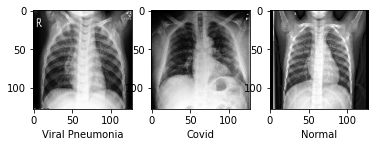

In [31]:
plt.subplot(131)
plt.imshow(x_train[0])
plt.xlabel('Viral Pneumonia')
plt.subplot(132)
plt.imshow(x_train[74])
plt.xlabel('Covid')
plt.subplot(133)
plt.imshow(x_train[189])
plt.xlabel('Normal') 
plt.show()

In [32]:
x_train_gray=np.dot(x_train[...,:3], [0.299, 0.587, 0.114])
x_test_gray=np.dot(x_test[...,:3], [0.299, 0.587, 0.114])

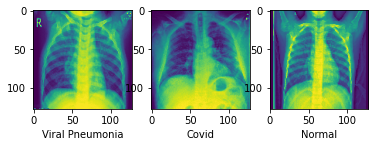

In [33]:
plt.subplot(131)
plt.imshow(x_train_gray[0])
plt.xlabel('Viral Pneumonia')
plt.subplot(132)
plt.imshow(x_train_gray[74])
plt.xlabel('Covid')
plt.subplot(133)
plt.imshow(x_train_gray[189])
plt.xlabel('Normal') 
plt.show()

In [34]:
# normalise
x_train_gray /= 255
x_test_gray /= 255
print(x_train_gray.shape)
print(x_test_gray.shape)

(251, 128, 128)
(66, 128, 128)


In [35]:
x_train_gray = x_train_gray.reshape(x_train_gray.shape[0], 128, 128, 1)
x_test_gray = x_test_gray.reshape(x_test_gray.shape[0], 128, 128, 1)
print(x_train_gray.shape)
print(x_test_gray.shape)

(251, 128, 128, 1)
(66, 128, 128, 1)


# Modelling

In [36]:
# specify input dimensions of each image
img_rows, img_cols = 128, 128
input_shape = (img_rows, img_cols, 1)

# batch size, number of classes, epochs
batch_size = 30
epochs = 10

In [42]:
# model
model = Sequential()


model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.25))


model.add(Dense(num_classes, activation='softmax'))


model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 246016)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               31490176  
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)              

In [43]:
# Compile model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [44]:
# Fit model
model.fit(x_train_gray, y_train_cat,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_gray, y_test_cat))

Epoch 1/10
9/9 [==============================] - 7s 737ms/step - loss: 1.1131 - accuracy: 0.3254 - val_loss: 1.0791 - val_accuracy: 0.5303
Epoch 2/10
9/9 [==============================] - 6s 717ms/step - loss: 1.0753 - accuracy: 0.4806 - val_loss: 1.0595 - val_accuracy: 0.4091
Epoch 3/10
9/9 [==============================] - 6s 702ms/step - loss: 1.0497 - accuracy: 0.4910 - val_loss: 1.0440 - val_accuracy: 0.3939
Epoch 4/10
9/9 [==============================] - 7s 721ms/step - loss: 1.0325 - accuracy: 0.4728 - val_loss: 1.0294 - val_accuracy: 0.3939
Epoch 5/10
9/9 [==============================] - 6s 712ms/step - loss: 0.9972 - accuracy: 0.5080 - val_loss: 1.0144 - val_accuracy: 0.4242
Epoch 6/10
9/9 [==============================] - 6s 709ms/step - loss: 0.9836 - accuracy: 0.5001 - val_loss: 0.9965 - val_accuracy: 0.5152
Epoch 7/10
9/9 [==============================] - 6s 703ms/step - loss: 0.9720 - accuracy: 0.5754 - val_loss: 0.9818 - val_accuracy: 0.5455
Epoch 8/10
9/9 [====